# Librerias

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Imagen original y creacion de hist

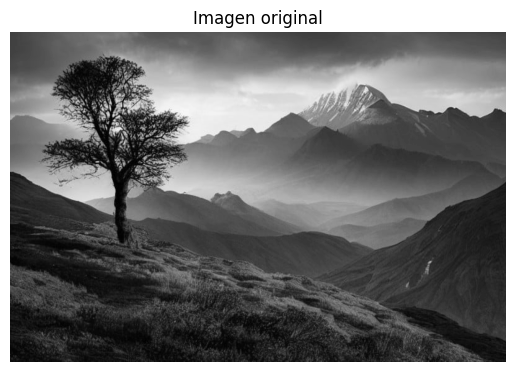

In [5]:
img = cv2.imread('../../IMAGES/ldscp.jpg', 0)

plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

alto, ancho = np.shape(img)

hist = np.zeros(256)


for x in range(alto):
    for y in range(ancho):
        intensidad = img[x, y]
        hist[intensidad] += 1


hist = hist / (ancho * alto)

# Función Ostu

(-0.5, 799.5, 532.5, -0.5)

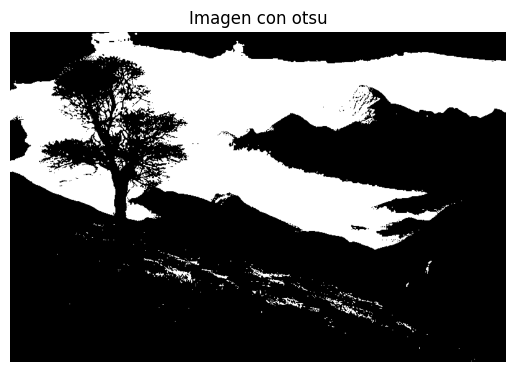

In [8]:
var = 0
umbral = 0

# Buscar el valor optimo dentro de todos los rangos ([1,2],[2,3],[3,4]...)
for T in range(1, 256):
    
    # Calcular pesos de background y foreground
    # fondo
    w1 = np.sum(hist[:T])    
    # frente
    w2 = np.sum(hist[T:])    
    
    # En los limites el valor es 0, por lo que no se toma en cuenta
    if w1 == 0 or w2 == 0:
        continue
    
    # Calcular medias de bg y fg
    # bg
    x1 = np.sum(np.arange(T) * hist[:T]) / w1
    # fg
    x2 = np.sum(np.arange(T, 256) * hist[T:]) / w2
    
    # Varianza entre bg y fg
    varianza = w1 * w2 * ((x1 - x2) ** 2)
    if varianza > var:
        var = varianza
        umbral = T
        
# Aplicar el T (umbral) óptimo
imagen_binaria = (img > umbral) * 255


plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen con otsu')
plt.axis('off')
